In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dati
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Stampa Missing Values e tipo per ogni attributo
print("\n\n Analisi dataset:\n")
df.info()

# Statistiche principali
print("\n\n Analisi features:\n")
print(df.describe())

# Stampa duplicati
duplicati = df.duplicated().sum()
print(f"\nNumero di righe duplicate: {duplicati}")

# Conteggio assoluto delle istanze per ogni ruolo
print("\n\n Distribuzione ruoli nel dataset:\n")
print(df['Position'].value_counts())

# Calcolo dei conteggi assoluti
counts = df['Position'].value_counts()

# Calcolo delle percentuali
percentages = df['Position'].value_counts(normalize=True) * 100

print("\n\nAnalisi distribuzione ruoli:\n")

# Ciclo per stampare i risultati
for role in counts.index:
    count = counts[role]
    pct = percentages[role]
    print(f"{role:<12}: {count:>3} atleti ({pct:>5.2f}%)")



 Analisi dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Pe

Injury_Next_Season
0    400
1    400
Name: count, dtype: int64


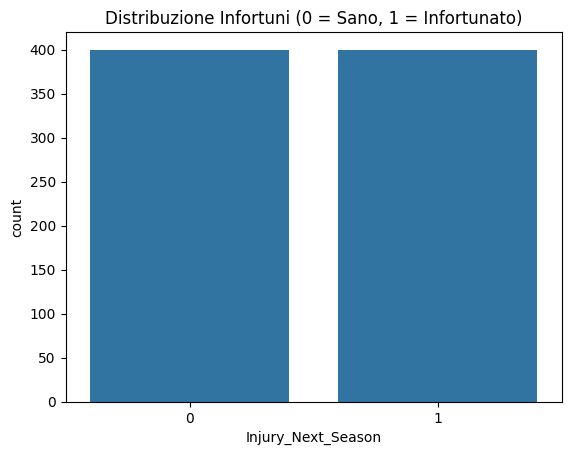

In [ ]:
# Definizione variabile target su cui verificare lo sbilanciamento
target_column = 'Injury_Next_Season'
print(df[target_column].value_counts())

# Visualizzazione grafica
sns.countplot(x=target_column, data=df)
plt.title('Distribuzione Infortuni (0 = Sano, 1 = Infortunato)')
plt.show()

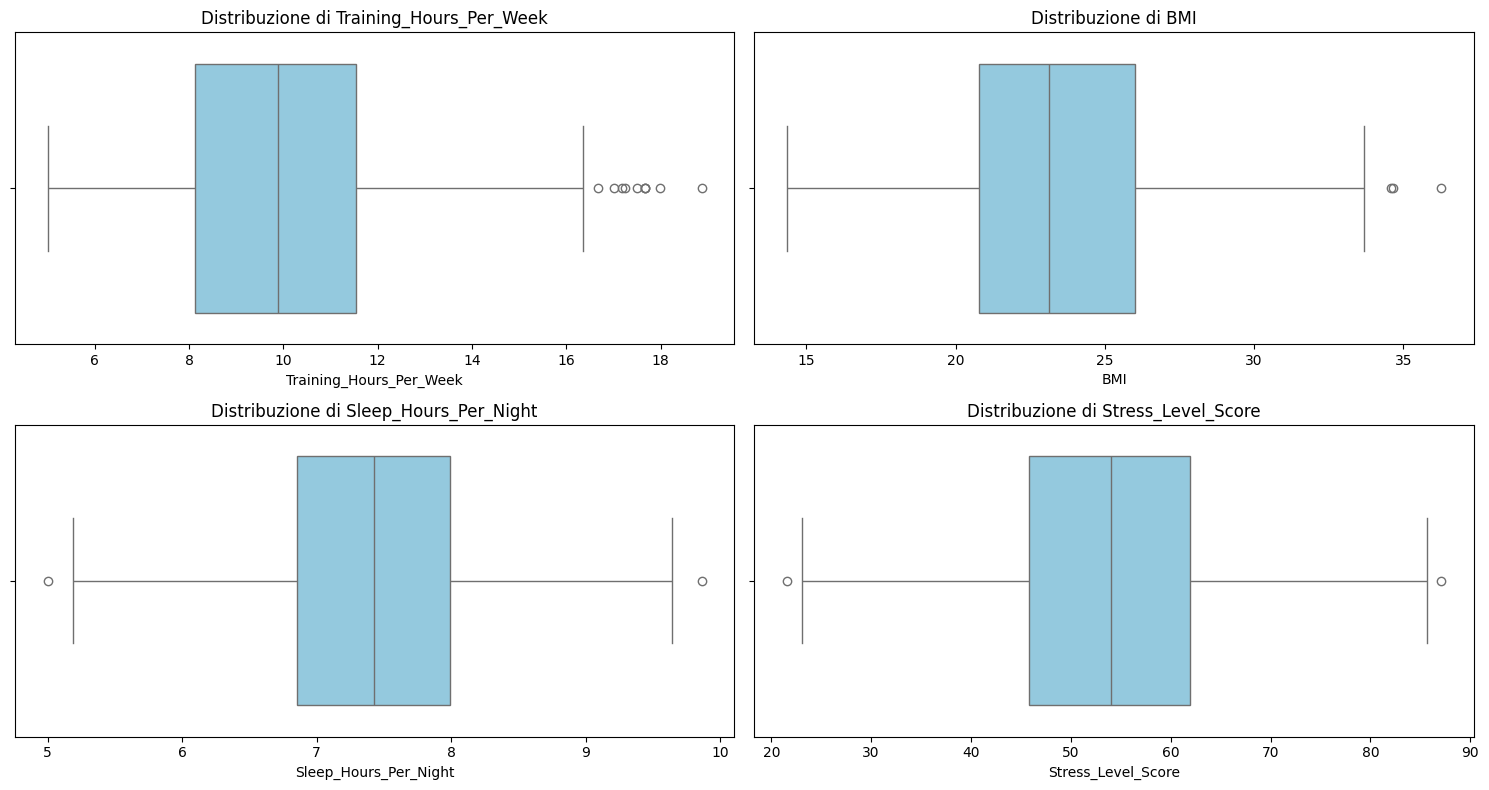

Righe originali: 800, Righe dopo pulizia outlier: 783


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezioniamo le feature fisiche più importanti per un controllo visivo
# BMI e Sleep_Hours_Per_Night perché hanno confini biologici precisi.
# Training_Hours_Per_Week per evitare di avere ripercussioni nello scaling.
# Stress_Level_Score poiché è rappresentativa per il task e percHè un suo valore discostante è sicuramente un errore
features_to_check = ['Training_Hours_Per_Week', 'BMI', 'Sleep_Hours_Per_Night', 'Stress_Level_Score']

# Grafici
plt.figure(figsize=(15, 8))
for i, col in enumerate(features_to_check):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Distribuzione di {col}')
plt.tight_layout()
plt.show()

# Rimozione outlier
Q1 = df[features_to_check].quantile(0.25)
Q3 = df[features_to_check].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[features_to_check] < (Q1 - 1.5 * IQR)) | (df[features_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Righe originali: {len(df)}, Righe dopo pulizia outlier: {len(df_clean)}")
df = df_clean.copy()

Injury_Next_Season
0    394
1    389
Name: count, dtype: int64


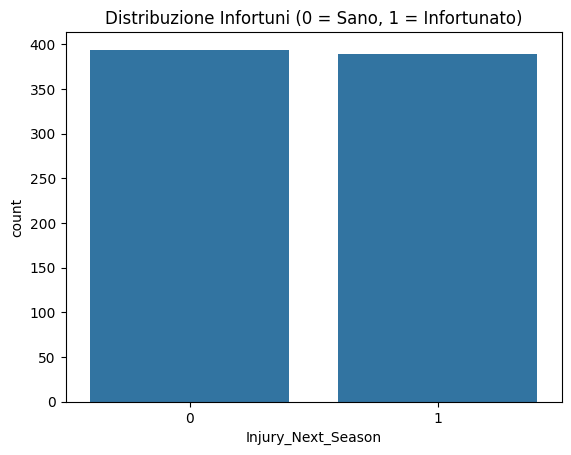

In [ ]:
# Definizione variabile target su cui verificare lo sbilanciamento
target_column = 'Injury_Next_Season'
print(df[target_column].value_counts())

# Visualizzazione grafica
sns.countplot(x=target_column, data=df)
plt.title('Distribuzione Infortuni (0 = Sano, 1 = Infortunato)')
plt.show()

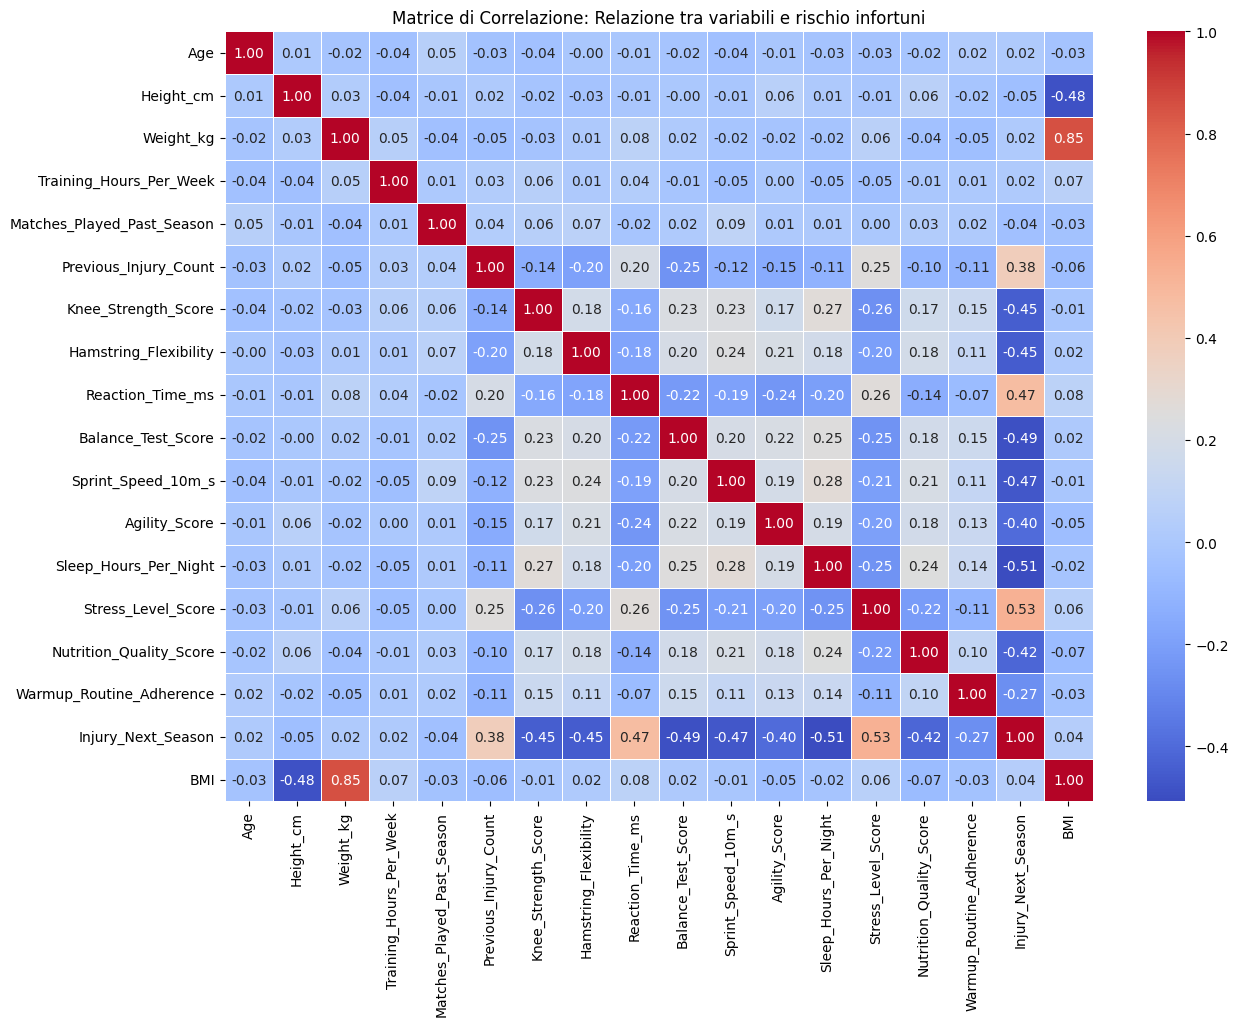

In [ ]:
# Heatmap della Correlazione
plt.figure(figsize=(14, 10))

# Calcoliamo la correlazione solo sulle colonne numeriche
# La correlazione di Pearson è un calcolo matematico che misura come variano le quantità, non le categorie.
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Creiamo la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matrice di Correlazione: Relazione tra variabili e rischio infortuni')
plt.show()

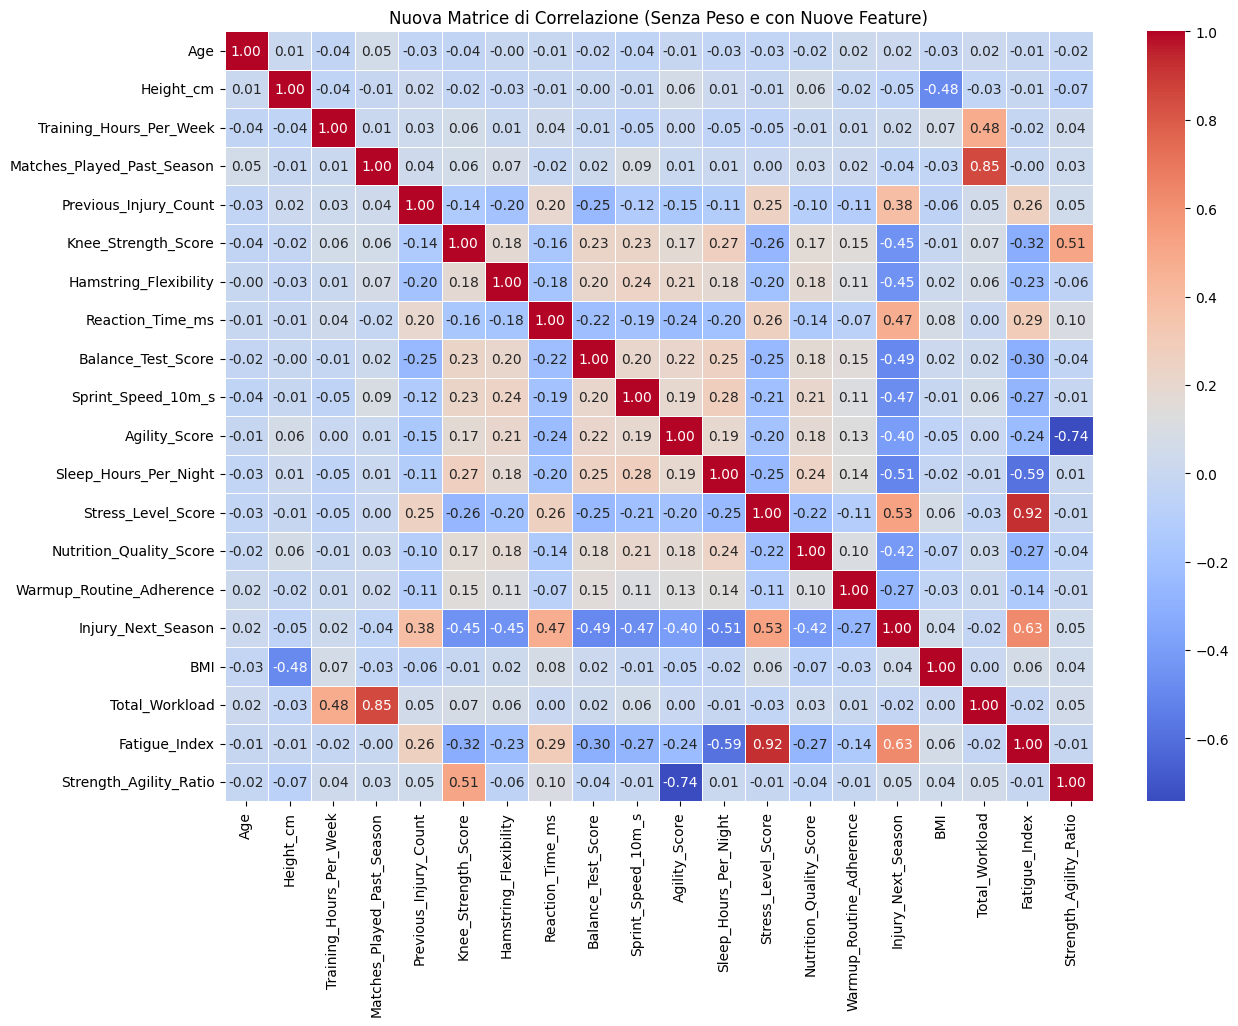

In [ ]:
# Feature selection (Rimozione ridondanza)
# Eliminiamo 'Weight_kg' perché è fortemente correlato al BMI (0.85)
df = df.drop(columns=['Weight_kg'])

# Feature engineering (Creazione nuove variabili)
df['Total_Workload'] = df['Training_Hours_Per_Week'] * df['Matches_Played_Past_Season']
df['Fatigue_Index'] = df['Stress_Level_Score'] / (df['Sleep_Hours_Per_Night'] + 1)
df['Strength_Agility_Ratio'] = df['Knee_Strength_Score'] / df['Agility_Score']

# Nuova heatmap con le features aggiornate
plt.figure(figsize=(14, 10))
corr_matrix_new = df.select_dtypes(include=[np.number]).corr()

sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Nuova Matrice di Correlazione (Senza Peso e con Nuove Feature)')
plt.show()


--- Logistic Regression (Baseline) ---
              precision    recall  f1-score   support

           0      0.917     0.971     0.943        68
           1      0.976     0.933     0.954        89

    accuracy                          0.949       157
   macro avg      0.947     0.952     0.948       157
weighted avg      0.951     0.949     0.949       157



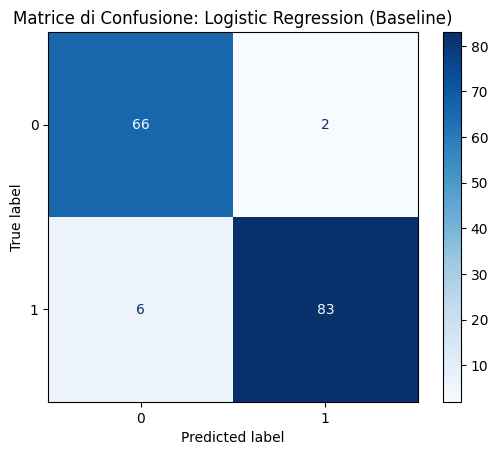


--- Random Forest (Complex) ---
              precision    recall  f1-score   support

           0      0.865     0.941     0.901        68
           1      0.952     0.888     0.919        89

    accuracy                          0.911       157
   macro avg      0.908     0.914     0.910       157
weighted avg      0.914     0.911     0.911       157



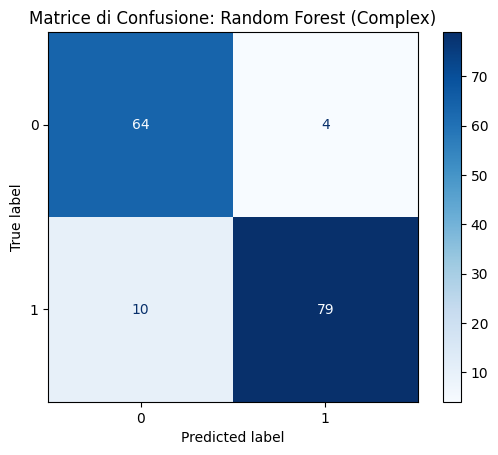

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Preparazione dati
X = df.drop('Injury_Next_Season', axis=1)
y = df['Injury_Next_Season']

# Definiamo quali colonne sono numeriche e quali categoriche
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Position']

# Preprocessing: Scaling per i numeri, OneHot per il testo (trasformazione del testo in variabili numeriche)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Divisione Training/Test (80/20 e con random_state sono sempre uguali le suddivisioni: utile per l'analisi)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definizione dei modelli
models = {
    'Logistic Regression (Baseline)': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'Random Forest (Complex)': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

# Addestramento e valutazione
for name, model in models.items():

    # Ciò evita anche data leakage
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, digits=3))

    # Visualizzazione matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matrice di Confusione: {name}')
    plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

random_states = [10, 20, 30, 40, 50]
rf_complex = models['Random Forest (Complex)']
all_accuracies_rf = []

print("STRESS TEST: PERFORMANCE RANDOM FOREST")

for i, rs in enumerate(random_states):
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, test_size=0.2, random_state=rs)
    rf_complex.fit(X_train_v, y_train_v)
    y_pred_v = rf_complex.predict(X_test_v)

    # Metriche
    acc = accuracy_score(y_test_v, y_pred_v)
    all_accuracies_rf.append(acc)
    report_dict = classification_report(y_test_v, y_pred_v, output_dict=True)
    recall_1 = report_dict['1']['recall']

    print(f"\nRIPETIZIONE {i+1} (random_state={rs})")
    # Stampa completa delle metriche
    print(classification_report(y_test_v, y_pred_v))

    # Stampa sintetica
    print(f"SINTESI -> Accuracy: {acc:.4f} | Recall (Classe 1): {recall_1:.4f}")
    print("-" * 50)

STRESS TEST: PERFORMANCE RANDOM FOREST

RIPETIZIONE 1 (random_state=10)
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        83
           1       0.93      0.91      0.92        74

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157

SINTESI -> Accuracy: 0.9236 | Recall (Classe 1): 0.9054
--------------------------------------------------

RIPETIZIONE 2 (random_state=20)
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        76
           1       0.96      0.90      0.93        81

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157

SINTESI -> Accuracy: 0.9299 | Recall (Classe 1): 0.9012
--------------------------------------------------

RIPETIZIONE 3 (random_stat

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --- STRESS TEST: LOGISTIC REGRESSION ---
lr_pipeline = models['Logistic Regression (Baseline)']
results_lr = []

print("\nSTRESS TEST: PERFORMANCE LOGISTIC REGRESSION")

for i in range(1, 6):
    rs = i * 10
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, test_size=0.2, random_state=rs)
    lr_pipeline.fit(X_train_v, y_train_v)
    y_pred_v = lr_pipeline.predict(X_test_v)

    # Metriche
    acc = accuracy_score(y_test_v, y_pred_v)
    results_lr.append(acc)
    report_dict = classification_report(y_test_v, y_pred_v, output_dict=True)
    recall_1 = report_dict['1']['recall']

    print(f"\nLR RIPETIZIONE {i} (random_state={rs})")
    # Stampa completa delle metriche
    print(classification_report(y_test_v, y_pred_v))

    # Stampa sintetica
    print(f"SINTESI -> Accuracy: {acc:.4f} | Recall (Classe 1): {recall_1:.4f}")
    print("-" * 50)


STRESS TEST: PERFORMANCE LOGISTIC REGRESSION

LR RIPETIZIONE 1 (random_state=10)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        83
           1       0.97      0.93      0.95        74

    accuracy                           0.96       157
   macro avg       0.96      0.95      0.96       157
weighted avg       0.96      0.96      0.96       157

SINTESI -> Accuracy: 0.9554 | Recall (Classe 1): 0.9324
--------------------------------------------------

LR RIPETIZIONE 2 (random_state=20)
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.96      0.95      0.96        81

    accuracy                           0.96       157
   macro avg       0.96      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157

SINTESI -> Accuracy: 0.9554 | Recall (Classe 1): 0.9506
--------------------------------------------------

LR RIPETIZION

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definiamo la griglia di parametri
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Creiamo la GridSearch basandoci sulla pipeline del Random Forest
# Usiamo scoring='recall' perché è fondamentale non perdere infortuni (meglio un falso allarme che un infortunio in più)
# cv=5 significa che il modello viene testato cinque volte su parti diverse del training set
# n_jobs=-1 per l'uso di tutti i processori
grid_search = GridSearchCV(models['Random Forest (Complex)'], param_grid, cv=5, scoring='recall', n_jobs=-1)

print("Inizio ricerca parametri ottimali...")
grid_search.fit(X_train, y_train)

print(f"Migliori parametri: {grid_search.best_params_}")

# Salviamo il modello migliore "ottimizzato"
best_rf_model = grid_search.best_estimator_

Inizio ricerca parametri ottimali...
Migliori parametri: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Reset dello split al random_state originale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performance del modello migliore su RS=42
y_pred_best = best_rf_model.predict(X_test)
print("--- PERFORMANCE MODELLO OTTIMIZZATO ---")
print(classification_report(y_test, y_pred_best))

print("STRESS TEST: MODELLO OTTIMIZZATO (Best RF)")
best_rf_accuracies = []

for i in range(1, 6):
    # Usiamo gli stessi random_state (10, 20, 30, 40, 50) per un confronto onesto
    X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, test_size=0.2, random_state=i*10)

    # Alleniamo il modello che ha trovato la GridSearch (es. max_depth=10)
    best_rf_model.fit(X_train_v, y_train_v)
    y_pred_v = best_rf_model.predict(X_test_v)

    acc = accuracy_score(y_test_v, y_pred_v)
    best_rf_accuracies.append(acc)
    print(f"Ripetizione {i} (random_state={i*10}): Accuracy = {acc:.4f}")

print(f"\n--- RIEPILOGO CONFRONTO STABILITÀ ---")
print(f"RF COMPLESSO (Precedente) - Varianza: 0.0004 | Minimo: 0.8726")
print(f"RF OTTIMIZZATO (Attuale)   - Varianza: {np.var(best_rf_accuracies):.4f} | Minimo: {np.min(best_rf_accuracies):.4f}")

--- PERFORMANCE MODELLO OTTIMIZZATO ---
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        68
           1       0.94      0.85      0.89        89

    accuracy                           0.89       157
   macro avg       0.88      0.89      0.88       157
weighted avg       0.89      0.89      0.89       157

STRESS TEST: MODELLO OTTIMIZZATO (Best RF)
Ripetizione 1 (random_state=10): Accuracy = 0.9172
Ripetizione 2 (random_state=20): Accuracy = 0.9172
Ripetizione 3 (random_state=30): Accuracy = 0.9299
Ripetizione 4 (random_state=40): Accuracy = 0.8981
Ripetizione 5 (random_state=50): Accuracy = 0.8790

--- RIEPILOGO CONFRONTO STABILITÀ ---
RF COMPLESSO (Precedente) - Varianza: 0.0004 | Minimo: 0.8726
RF OTTIMIZZATO (Attuale)   - Varianza: 0.0003 | Minimo: 0.8790



 PERFORMANCE PER RUOLO (Slicing con Logistic Regression)
Ruolo: Midfielder | Istanze totali nel test set: 39
Accuratezza per Midfielder: 0.90
Ruolo: Forward | Istanze totali nel test set: 39
Accuratezza per Forward: 0.98
Ruolo: Defender | Istanze totali nel test set: 41
Accuratezza per Defender: 0.95
Ruolo: Goalkeeper | Istanze totali nel test set: 38
Accuratezza per Goalkeeper: 0.97


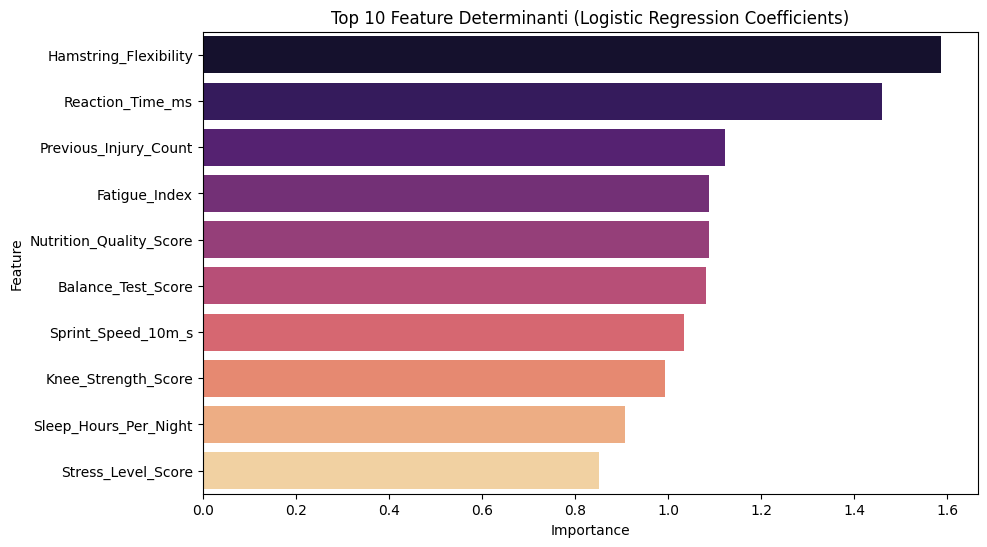


VALORI TOP 10 FEATURE IMPORTANCE:
                Feature  Importance
  Hamstring_Flexibility    1.586113
       Reaction_Time_ms    1.460055
  Previous_Injury_Count    1.122814
          Fatigue_Index    1.088655
Nutrition_Quality_Score    1.087988
     Balance_Test_Score    1.080467
     Sprint_Speed_10m_s    1.034267
    Knee_Strength_Score    0.993519
  Sleep_Hours_Per_Night    0.907705
     Stress_Level_Score    0.851806


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Performace per ruolo (Slicing)
lr_pipeline = models['Logistic Regression (Baseline)']

print("\n PERFORMANCE PER RUOLO (Slicing con Logistic Regression)")
for position in df['Position'].unique():
    mask = X_test['Position'] == position
    if mask.any():
        acc = accuracy_score(y_test[mask], lr_pipeline.predict(X_test[mask]))
        print(f"Accuratezza per {position}: {acc:.2f}")

# Spiegabilità (Coefficienti della Logistic Regression)
lr_classifier = lr_pipeline.named_steps['classifier']

# Nomi delle feature
cat_features_encoded = lr_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['Position'])
all_feature_names = numeric_features.tolist() + cat_features_encoded.tolist()

# Coefficienti in valore assoluto
coefficients = lr_classifier.coef_[0]
feature_imp = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Grafico
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_imp.head(10),
    hue='Feature',
    palette='magma',
    legend=False
)
plt.title('Top 10 Feature Determinanti (Logistic Regression Coefficients)')
plt.show()

print("\nVALORI TOP 10 FEATURE IMPORTANCE:")
print(feature_imp.head(10).to_string(index=False))

In [ ]:
# Definizione delle feature da eliminare
features_to_drop = ['Age', 'Height_cm', 'Agility_Score']

# Preparazione dati
X_lean = df.drop(['Injury_Next_Season'] + features_to_drop, axis=1)
y_lean = df['Injury_Next_Season']

# Definiamo quali colonne sono numeriche e quali categoriche
numeric_features_lean = X_lean.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Position']

preprocessor_lean = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_lean),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split dei dati
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lean, y_lean, test_size=0.2, random_state=42
)

# Definizione e addestramento dei modelli
logistic_model_lean = Pipeline([
    ('preprocessor', preprocessor_lean),
    ('classifier', LogisticRegression())
])

# Random Forest Ottimizzato (Parametri usciti dalla GridSearchCV)
model_rf_lean = Pipeline([
    ('preprocessor', preprocessor_lean),
    ('classifier', RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        max_features='sqrt',
        random_state=42
    ))
])

# Training
logistic_model_lean.fit(X_train_l, y_train_l)
model_rf_lean.fit(X_train_l, y_train_l)

# Confronto
print("CONFRONTO DEFINITIVO: MODELLI SNELLI (Senza Age, Height, Agility)")

print("\n[ 1. LOGISTIC REGRESSION (Dataset Snello) ]")
print(classification_report(y_test_l, logistic_model_lean.predict(X_test_l), digits=3))

print("\n[ 2. RANDOM FOREST (Ottimizzato - Dataset Snello) ]")
print(classification_report(y_test_l, model_rf_lean.predict(X_test_l), digits=3))

CONFRONTO DEFINITIVO: MODELLI SNELLI (Senza Age, Height, Agility)

[ 1. LOGISTIC REGRESSION (Dataset Snello) ]
              precision    recall  f1-score   support

           0      0.986     0.912     0.948        80
           1      0.919     0.988     0.952        80

    accuracy                          0.950       160
   macro avg      0.953     0.950     0.950       160
weighted avg      0.953     0.950     0.950       160


[ 2. RANDOM FOREST (Ottimizzato - Dataset Snello) ]
              precision    recall  f1-score   support

           0      0.949     0.925     0.937        80
           1      0.927     0.950     0.938        80

    accuracy                          0.938       160
   macro avg      0.938     0.938     0.937       160
weighted avg      0.938     0.938     0.937       160

